<a href="https://colab.research.google.com/github/tkalra11/PyTorch_FCC/blob/master/03_pytorch_computer_vision_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchvision
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 0. CV libraries in PyTorch

* [`torchvision`](https://pytorch.org/vision/stable/index.html)
* `torchvision.datasets`
* `torchvision.models`
* `torchvision.transforms`
* `torch.utils.data.Dataset`
* `torch.utils.data.DataLoader`


In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


## 1. Getting a dataset

Dataset to be used - Fashion MNIST from [`torchvision.datasets`](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#fashionmnist)

In [3]:
# Setup training dataset

train_data = datasets.FashionMNIST(
    root = 'data' ,
    train = True , 
    download = True , 
    transform = ToTensor() , 
    target_transform = None
    )

test_data = datasets.FashionMNIST(
    root = 'data' ,
    train = False , 
    download = True , 
    transform = ToTensor() , 
    target_transform = None
    )

In [4]:
len(train_data) , len(test_data)

(60000, 10000)

In [5]:
# See first training example
image , label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_idx = train_data.class_to_idx
class_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
image.shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

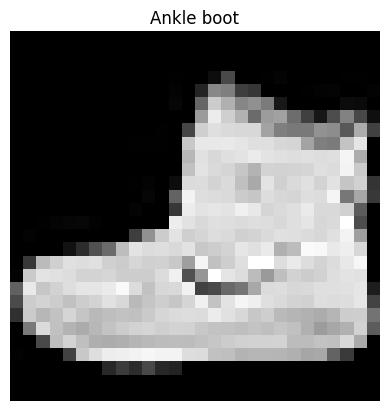

In [9]:
plt.imshow(image.squeeze() , cmap = 'gray')
plt.title(class_names[label]);
plt.axis(False)

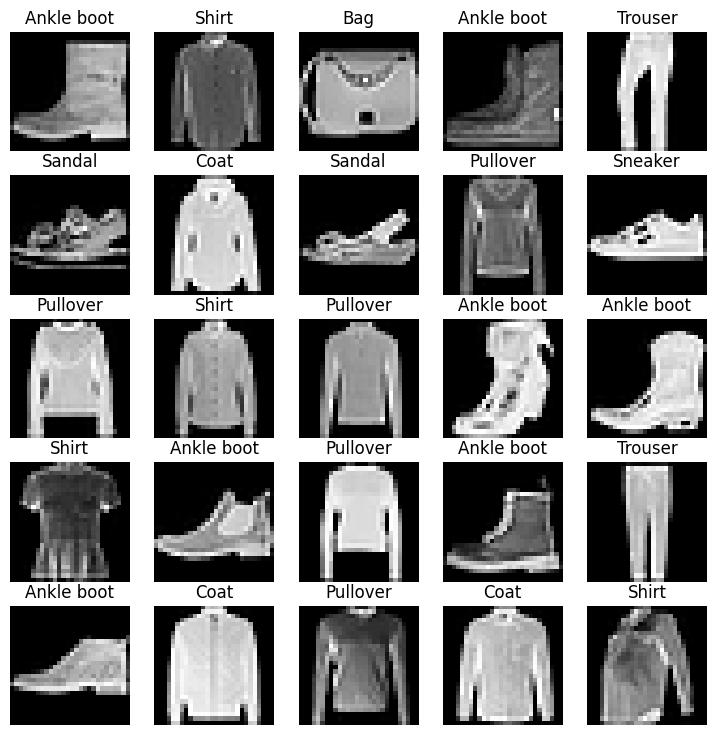

In [10]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows , cols = 5 , 5
for i in range(1 , rows*cols+1):
    random_idx = torch.randint(0 , len(train_data) , size = [1]).item()
    image , label = train_data[random_idx]
    plt.subplot(rows , cols , i)
    plt.imshow(image.squeeze() , cmap = 'gray')
    plt.title(class_names[label])
    plt.axis(False);

## 2. Preparing the data loader

DataLoader turns the dataset into a python **iterable**.

Specifically data into batches (or mini batches) :
* It is more computationally efficient as we break it down into `x` no of images (where `x` is the batch size) .
* Gives neural network more chances to upgrade its gradient per epoch.

For more : https://www.youtube.com/watch?v=4qJaSmvhxi8

In [11]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [12]:
# Setup the batch size
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                               batch_size=BATCH_SIZE ,
                               shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                              batch_size = BATCH_SIZE,
                              shuffle = False)

print(f"Train data loader : {train_dataloader}")
print(f"Train data loader length : {len(train_dataloader)} of batch size : {BATCH_SIZE}")
print(f"Test data loader : {test_dataloader}")
print(f"Test data loader length : {len(test_dataloader)} of batch size : {BATCH_SIZE}")

Train data loader : <torch.utils.data.dataloader.DataLoader object at 0x7f45bf0710f0>
Train data loader length : 1875 of batch size : 32
Test data loader : <torch.utils.data.dataloader.DataLoader object at 0x7f45bf0726e0>
Test data loader length : 313 of batch size : 32


Sample features shape : torch.Size([32, 1, 28, 28])
Sample labels shape : torch.Size([32])


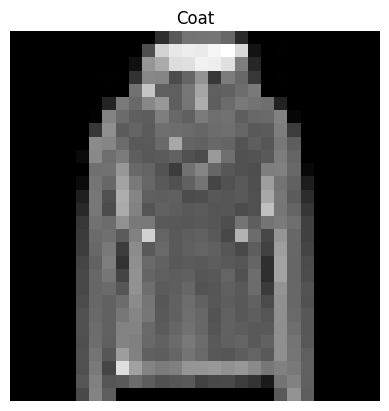

In [13]:
sample_features , sample_labels = next(iter(train_dataloader))

print(f"Sample features shape : {sample_features.shape}")
print(f"Sample labels shape : {sample_labels.shape}")

random_idx = torch.randint(0 , len(sample_features) , size = [1]).item()
sample_img = sample_features[random_idx].squeeze()
sample_label = sample_labels[random_idx]

plt.imshow(sample_img , cmap = 'gray')
plt.title(class_names[sample_label])
plt.axis(False);

## 3. Model 0 : Baseline Model

In [14]:
# Creating the baseline model

class FashionMNISTModelV0 (nn.Module):
    def __init__(self ,
                 input_shape : int ,
                 hidden_units : int,
                 output_shape : int ) :
                 
                 super().__init__()

                 self.layer_stack = nn.Sequential(
                      nn.Flatten(),
                      nn.Linear(in_features = input_shape , out_features = hidden_units),
                      nn.Linear(in_features = hidden_units , out_features = output_shape)
                 )

    def forward(self , x):
        return self.layer_stack(x)

In [15]:
# Setting seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Creating an instance of the model class
model_0 = FashionMNISTModelV0(
    input_shape= 28*28,
    hidden_units = 10,
    output_shape = len(class_names) 
).to('cpu')

In [16]:
# Check for dummy data

dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setting up loss , optimizer and evaluation metrics

In [17]:
from torchmetrics.classification import MulticlassAccuracy

# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

# Accuracy function
accuracy_fn = MulticlassAccuracy(num_classes = len(class_names) , top_k = 1)

### 3.2 Function to time the experience

Things to be tracked: 
* Model's performance (accuracy, loss, etc.)
* How fast it runs



In [18]:
from timeit import default_timer as timer
def print_train_time(start : float,
                     end : float,
                     device : torch.device = None):
    """
    Prints difference between start and end time.
    """
    total_time = end - start
    print(f"Train time on {device} : {total_time : .5f} seconds")
    return total_time

In [19]:
start_time = timer()

# code

end_time = timer()
print_train_time(start = start_time,
                 end = end_time, 
                 device = 'cpu')

Train time on cpu :  0.00003 seconds


2.7393999971536687e-05

### 3.3 Creating the training loop on batches of data

In [20]:
# tqdm for progress bar
from tqdm.auto import tqdm

# setting the seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# start time
train_start_time_on_cpu = timer()

epochs = 3

# training loop
for epoch in tqdm(range(epochs)):
    print(f"\n ---- Epoch : {epoch} ---- \n")

    # training
    train_loss  , train_acc = 0 , 0
    # loop through the batches
    for batch , (X , y ) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)
        loss = loss_fn(y_pred , y)
        acc = accuracy_fn(y_pred , y)
        train_loss += loss
        train_acc += acc
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 600 == 0 :
            print(f"Looked at {batch * len(X)} /  {len(train_dataloader.dataset)} samples . ")
        
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    # testing 
    test_loss , test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X , y in test_dataloader:
            test_pred = model_0(X)
            loss = loss_fn(test_pred , y)
            acc = accuracy_fn(test_pred , y)
            test_loss += loss
            test_acc += acc
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"Epoch : {epoch} | Train Loss : {train_loss:.4f} | Test Loss : {test_loss:.4f} | Train Accuracy : {train_acc*100:.3f}% | Test Accuracy : {test_acc*100:.3f}%")

train_end_time_on_cpu = timer()

print()
total_cpu_train_time = print_train_time(start = train_start_time_on_cpu,
                 end = train_end_time_on_cpu,
                 device = 'cpu')

  0%|          | 0/3 [00:00<?, ?it/s]


 ---- Epoch : 0 ---- 

Looked at 0 /  60000 samples . 
Looked at 19200 /  60000 samples . 
Looked at 38400 /  60000 samples . 
Looked at 57600 /  60000 samples . 
Epoch : 0 | Train Loss : 0.5904 | Test Loss : 0.5095 | Train Accuracy : 76.357% | Test Accuracy : 79.526%

 ---- Epoch : 1 ---- 

Looked at 0 /  60000 samples . 
Looked at 19200 /  60000 samples . 
Looked at 38400 /  60000 samples . 
Looked at 57600 /  60000 samples . 
Epoch : 1 | Train Loss : 0.4763 | Test Loss : 0.4799 | Train Accuracy : 80.343% | Test Accuracy : 80.415%

 ---- Epoch : 2 ---- 

Looked at 0 /  60000 samples . 
Looked at 19200 /  60000 samples . 
Looked at 38400 /  60000 samples . 
Looked at 57600 /  60000 samples . 
Epoch : 2 | Train Loss : 0.4550 | Test Loss : 0.4766 | Train Accuracy : 81.023% | Test Accuracy : 80.629%

Train time on cpu :  45.58300 seconds


## 4. Evaluate the model

In [21]:
from torch.cuda import device_of
torch.manual_seed(42)

def eval_model(model : torch.nn.Module ,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn,
               device : torch.device) :
               """
               Returns a dictionary containing the results of model preidicting on the data laoder.
               """
               eval_loss , eval_acc = 0 , 0
               model.eval()
               with torch.inference_mode():
                    for X , y in tqdm(data_loader):
                        X , y = X.to(device) , y.to(device)

                        # making predictions
                        y_pred = model(X)

                        # calculate the loss and accuracy per batch
                        loss = loss_fn(y_pred , y)
                        acc = accuracy_fn(y_pred , y)

                        # accumulate the loss and accuracy per batch
                        eval_loss += loss
                        eval_acc += acc
                    # calculate average loss and accuracy per epoch
                    eval_loss /= len(data_loader)
                    eval_acc /= len(data_loader)
                    return {
                "model_name" : model.__class__.__name__,
                "model_loss" : eval_loss.item(),
                "model_acc" : eval_acc.item()*100 }

In [22]:
model_0_results = eval_model(model = model_0 ,
                             data_loader = test_dataloader , 
                             loss_fn=loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = 'cpu')
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 80.62935471534729}

## 5. Model 1: Device agnostic and non-linearity

In [23]:
#Setting up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [24]:
# Creating the baseline model

class FashionMNISTModelV1 (nn.Module):
    def __init__(self ,
                 input_shape : int ,
                 hidden_units : int,
                 output_shape : int ) :
                 
                 super().__init__()

                 self.layer_stack = nn.Sequential(
                      nn.Flatten(),
                      nn.Linear(in_features = input_shape , out_features = hidden_units),
                      nn.ReLU(),
                      nn.Linear(in_features = hidden_units , out_features = output_shape),
                      nn.ReLU()
                 )

    def forward(self , x):
        return self.layer_stack(x)

In [25]:
# Setting seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Creating # gpu instance of the model class
model_1 = FashionMNISTModelV1(
    input_shape= 28*28,
    hidden_units = 10,
    output_shape = len(class_names) 
).to(device)

In [26]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

# Accuracy function
accuracy_fn = MulticlassAccuracy(num_classes = len(class_names)).to(device)

In [27]:
type(accuracy_fn)

torchmetrics.classification.accuracy.MulticlassAccuracy

### 5.1 Functionizing the train , test loops

In [28]:
def train_step(model : torch.nn.Module ,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               accuracy_fn,
               device : torch.device) :
            """
            Performs a training loop using the model on the given data loader.

            Args:

            Returns:

            """
            train_loss , train_acc = 0 , 0

            # training 
            model.train()
            for batch , (X , y) in enumerate(train_dataloader):

                X , y = X.to(device) , y.to(device)

                # predicting
                y_preds = model(X)

                # calculate loss and accuracy per batch
                loss = loss_fn(y_preds , y)
                acc = accuracy_fn( y_preds , y)

                # acculumating loss and accuracy per batch
                train_loss += loss
                train_acc += acc

                # gradients zero
                optimizer.zero_grad()

                # loss backwards
                loss.backward()

                # stepping the optimizer
                optimizer.step()

            train_loss /= len(data_loader)
            train_acc /= len(data_loader)

            print(f"Train Loss : {train_loss : .4f}   |   Train Accuracy : {train_acc * 100 : .2f}% \n")

In [29]:
def test_step(model : torch.nn.Module ,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn,
               device : torch.device) :
            """
            Performs a testing loop using the model on the given data loader.

            Args:

            Returns:

            """
            test_loss , test_acc = 0 , 0

            # testing 
            model.eval()
            with torch.inference_mode():
                for (X , y) in data_loader:
                    X , y = X.to(device) , y.to(device)

                    # predicting
                    test_preds = model(X)

                    # calculate loss and accuracy per batch
                    loss = loss_fn(test_preds , y)
                    acc = accuracy_fn(test_preds , y)

                    # acculumating loss and accuracy per batch
                    test_loss += loss
                    test_acc += acc

                # loss and accuracy per epoch
                test_loss /= len(data_loader)
                test_acc /= len(data_loader)

            print(f"Test Loss : {test_loss : .4f}   |   Test Accuracy : {test_acc * 100 : .2f}% \n")

In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#starting the timer
train_start_time_on_gpu = timer()

#number of epochs
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"\n ---- Epoch : {epoch} ----")
    train_step(model= model_1,
               data_loader = train_dataloader ,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn =accuracy_fn,
               device = device)
    test_step(model= model_1,
               data_loader = test_dataloader ,
               loss_fn = loss_fn,
               accuracy_fn =accuracy_fn,
               device = device)
    
train_end_time_on_gpu = timer()

print()
total_gpu_train_time = print_train_time(start = train_start_time_on_gpu,
                 end = train_end_time_on_gpu,
                 device = str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]


 ---- Epoch : 0 ----
Train Loss :  1.0920   |   Train Accuracy :  59.10% 

Test Loss :  0.9564   |   Test Accuracy :  63.02% 


 ---- Epoch : 1 ----
Train Loss :  0.7810   |   Train Accuracy :  69.43% 

Test Loss :  0.7223   |   Test Accuracy :  71.41% 


 ---- Epoch : 2 ----
Train Loss :  0.6703   |   Train Accuracy :  73.31% 

Test Loss :  0.6850   |   Test Accuracy :  72.57% 


Train time on cuda:0 :  42.32595 seconds


In [31]:
model_1_results = eval_model(model = model_1 ,
                             data_loader = test_dataloader , 
                             loss_fn=loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [32]:
print(f"Model 0 results : \n{model_0_results}")
print(f"Time taken by cpu : {total_cpu_train_time }")

Model 0 results : 
{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.47663894295692444, 'model_acc': 80.62935471534729}
Time taken by cpu : 45.582995804999996


In [33]:
print(f"Model 1 results : \n{model_1_results}")
print(f"Time taken by gpu : {total_gpu_train_time }")

Model 1 results : 
{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.6850008964538574, 'model_acc': 72.57184982299805}
Time taken by gpu : 42.32595405200004


## 6. Convolutional Neural Network (CNN)

Explainer: https://poloclub.github.io/cnn-explainer/

In [34]:
# Create a CNN

class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates TinyVGG
    """
    def __init__(self , 
                 input_shape : int , 
                 hidden_units : int , 
                 output_shape : int) :
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units * 7 * 7,
                      out_features = output_shape)
        )
    
    def forward(self , x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [35]:
model_2 = FashionMNISTModelV2(input_shape = 1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

In [36]:
# Setup the optimizer, loss function and accuracy

# loss function
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model_2.parameters() , 
                            lr = 0.1)

# accuracy function
accuracy_fn = accuracy_fn = MulticlassAccuracy(num_classes = len(class_names) , top_k = 1).to(device)

In [37]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#starting the timer
cnn_start_time = timer()

#number of epochs
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"\n ---- Epoch : {epoch} ----")
    train_step(model= model_2,
               data_loader = train_dataloader ,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn =accuracy_fn,
               device = device)
    test_step(model= model_2,
               data_loader = test_dataloader ,
               loss_fn = loss_fn,
               accuracy_fn =accuracy_fn,
               device = device)
    
cnn_end_time = timer()

print()
cnn_train_time = print_train_time(start = cnn_start_time,
                 end = cnn_end_time,
                 device = str(next(model_2.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]


 ---- Epoch : 0 ----
Train Loss :  0.6445   |   Train Accuracy :  73.84% 

Test Loss :  0.4086   |   Test Accuracy :  82.77% 


 ---- Epoch : 1 ----
Train Loss :  0.3559   |   Train Accuracy :  84.12% 

Test Loss :  0.3514   |   Test Accuracy :  84.39% 


 ---- Epoch : 2 ----
Train Loss :  0.3171   |   Train Accuracy :  85.41% 

Test Loss :  0.3199   |   Test Accuracy :  85.31% 


Train time on cuda:0 :  49.25100 seconds


In [38]:
model_2_results = eval_model(model = model_2 ,
                             data_loader = test_dataloader , 
                             loss_fn=loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [39]:
print(f"Model 0 results : \n{model_0_results}")
print(f"Time taken by cpu : {total_cpu_train_time }")

Model 0 results : 
{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.47663894295692444, 'model_acc': 80.62935471534729}
Time taken by cpu : 45.582995804999996


In [40]:
print(f"Model 1 results : \n{model_1_results}")
print(f"Time taken by gpu : {total_gpu_train_time }")

Model 1 results : 
{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.6850008964538574, 'model_acc': 72.57184982299805}
Time taken by gpu : 42.32595405200004


In [41]:
print(f"Model 2 results : \n{model_2_results}")
print(f"Time taken : {cnn_train_time }")

Model 2 results : 
{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.319853812456131, 'model_acc': 85.30548214912415}
Time taken : 49.250997986000016


## 7. Comparing the results of the 3 models

In [42]:
# comparing the results

import pandas as pd

results = pd.DataFrame([model_0_results,
                        model_1_results,
                        model_2_results])

results['training_time'] = [total_cpu_train_time ,
                            total_gpu_train_time ,
                            cnn_train_time]

In [43]:
results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,80.629355,45.582996
1,FashionMNISTModelV1,0.685001,72.571850,42.325954
2,FashionMNISTModelV2,0.319854,85.305482,49.250998


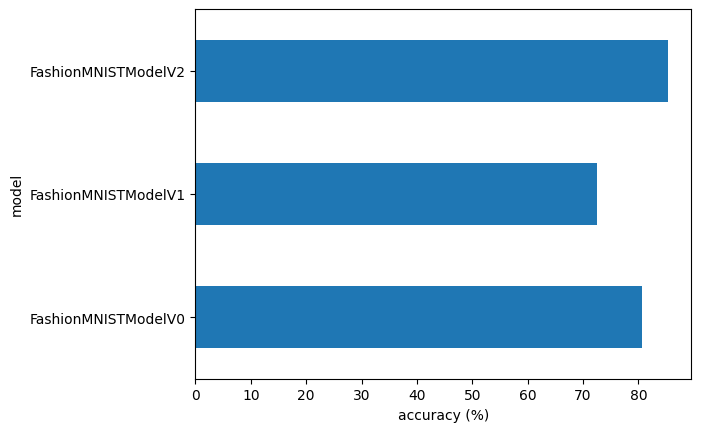

In [44]:
# visualizing the results
results.set_index("model_name")["model_acc"].plot(kind = "barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [45]:
def make_predictions (model : torch.nn.Module , 
                      data : list , 
                      device : torch.device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample , dim =0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze() , dim = 0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

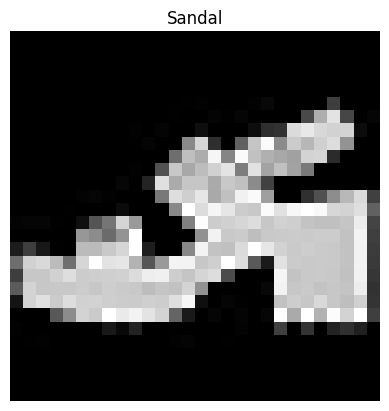

In [46]:
import random
random.seed(42)
test_sample = []
test_labels = []
for sample,label in random.sample(list(test_data) , k = 9):
    test_sample.append(sample)
    test_labels.append(label)

plt.imshow(test_sample[0].squeeze() , cmap = "gray")
plt.title(class_names[test_labels[0]])
plt.axis(False);

In [47]:
pred_probs = make_predictions(model = model_2,
                                data = test_sample,
                                device = device)
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [48]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

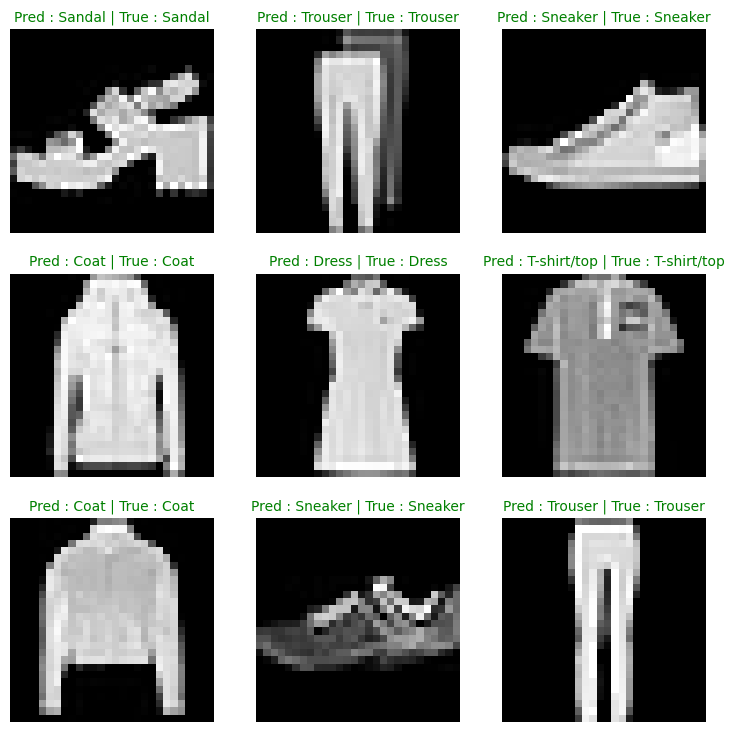

In [49]:
# plotting the predicted values

plt.figure(figsize = (9,9))
rows= 3 
cols = 3
for i , sample in enumerate(test_sample):
    plt.subplot(rows , cols, i+1)
    plt.imshow(sample.squeeze() , cmap = 'gray')
    pred_label = class_names[pred_classes[i]]
    true_label = class_names[test_labels[i]]
    title_text = f"Pred : {pred_label} | True : {true_label}"
    if pred_label == true_label:
        plt.title(title_text , c='g' , fontsize = 10)
    else:
        plt.title(title_text , c='r' , fontsize = 10)
    plt.axis(False)

In [51]:
from torchmetrics import ConfusionMatrix
from tqdm.auto import tqdm
from mlxtend.plotting import plot_confusion_matrix

In [52]:
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X , y in tqdm(test_dataloader , desc = "Making predictions..."):
        X , y = X.to(device) , y.to(device)
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit.squeeze() , dim =0).argmax(dim = 1)
        y_preds.append(y_pred.cpu())
y_preds_tensor = torch.cat(y_preds)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [53]:
Confusion_Matrix = ConfusionMatrix(num_classes = len(class_names) , task = 'multiclass')
confmat = Confusion_Matrix( y_preds_tensor , test_data.targets)

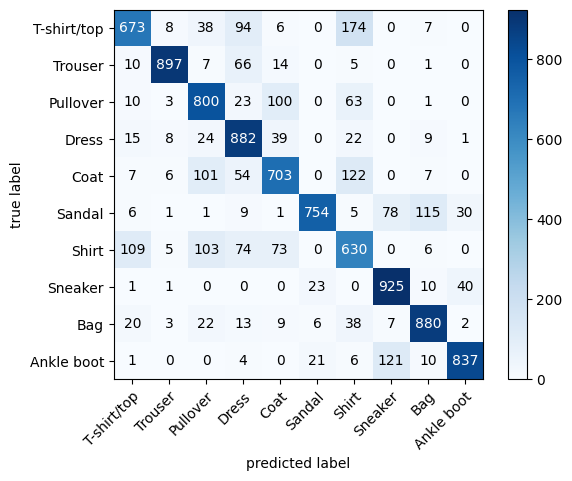

In [54]:
fig, ax = plot_confusion_matrix(conf_mat = confmat.numpy(),
                                colorbar=True,
                                class_names = class_names)
plt.show()